<a href="https://colab.research.google.com/github/Viroslav/Projects/blob/main/ML(LASO_%2B_Ridge_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
 import numpy as np
 import requests as req
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set_theme()

In [ ]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/'

In [ ]:
data = pd.read_csv(url + 'bikes_rent.csv')

In [ ]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [ ]:
data[data['season'] == 1].cnt.describe().T

count     181.000000
mean     2604.132597
std      1399.942119
min       431.000000
25%      1538.000000
50%      2209.000000
75%      3456.000000
max      7836.000000
Name: cnt, dtype: float64

In [ ]:
data[data['season'] == 2].cnt.describe().T

count     184.000000
mean     4992.331522
std      1695.977235
min       795.000000
25%      4003.000000
50%      4941.500000
75%      6377.000000
max      8362.000000
Name: cnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


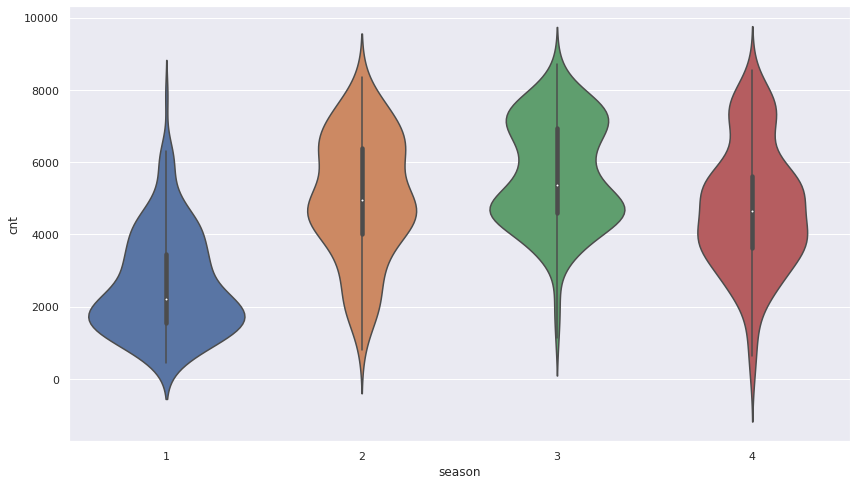

In [ ]:
plt.figure(figsize = (14, 8));
sns.violinplot(data['season'], data['cnt']);

<Figure size 1008x576 with 0 Axes>

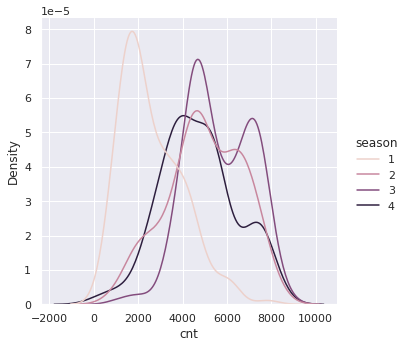

In [ ]:
plt.figure(figsize = (14, 8));
sns.displot(data = data, hue = 'season', x = 'cnt', kind="kde");

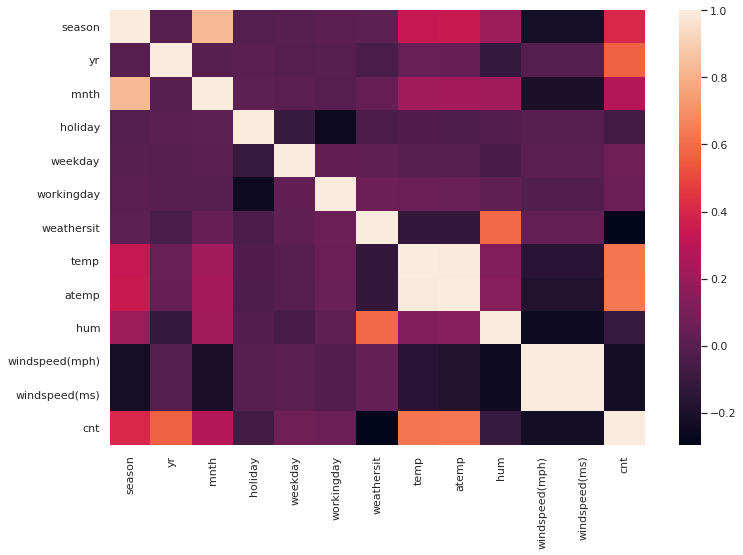

In [ ]:
sns.heatmap(data.corr());

In [ ]:
data.shape # у нас 12 признаков и 1 целевой

(731, 13)

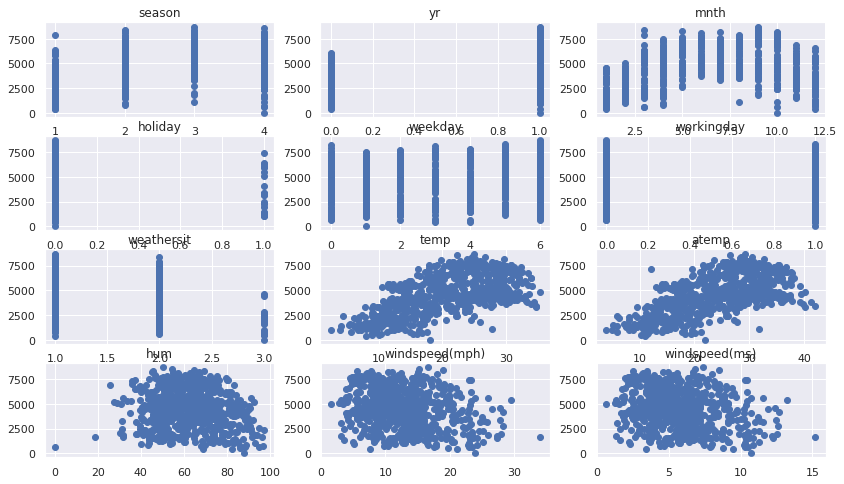

In [ ]:
plt.figure(figsize = (14, 8));
for i, col in enumerate(data.columns[:-1]):   #enumerate - считает номер итерации и выдаёт саму колонку, нам нужно именно i и col
  plt.subplot(4, 3, i + 1)      # так как у нас 12 признаков строим картинку 4 на 3, 3-й аргумент - номер итерации, чтобы знать где строит
  plt.scatter(data[col], data['cnt']) 
  plt.title(col)

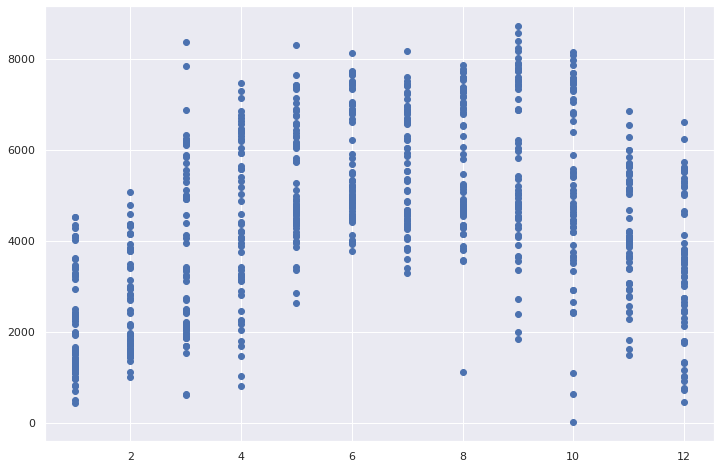

In [ ]:
 plt.scatter(data.mnth, data.cnt) # зависимость явно не линейная

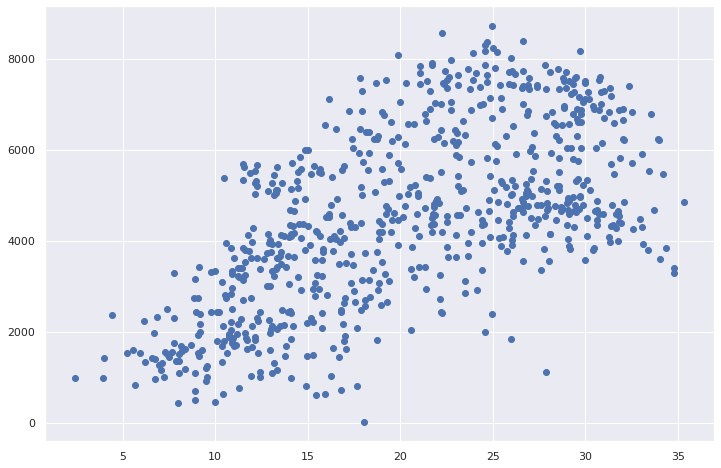

In [ ]:
plt.scatter(data.temp, data.cnt)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV  # не простой перебор по сетке, (монотонная зависимость качества модели от параметра регуляризации)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [ ]:
np.arange(1,  1001, dtype = float).shape

(1000,)

In [ ]:
alphas = [1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
       2.01058063e+01, 1.87507423e+01, 1.74870050e+01, 1.63084394e+01,
       1.52093052e+01, 1.41842489e+01, 1.32282780e+01, 1.23367363e+01,
       1.15052816e+01, 1.07298641e+01, 1.00067072e+01, 9.33228862e+00,
       8.70332360e+00, 8.11674872e+00, 7.56970702e+00, 7.05953410e+00,
       6.58374513e+00, 6.14002274e+00, 5.72620576e+00, 5.34027866e+00,
       4.98036175e+00, 4.64470204e+00, 4.33166466e+00, 4.03972496e+00,
       3.76746102e+00, 3.51354676e+00, 3.27674547e+00, 3.05590379e+00,
       2.84994610e+00, 2.65786927e+00, 2.47873778e+00, 2.31167915e+00,
       2.15587971e+00, 2.01058063e+00, 1.87507423e+00, 1.74870050e+00,
       1.63084394e+00, 1.52093052e+00, 1.41842489e+00, 1.32282780e+00,
       1.23367363e+00, 1.15052816e+00, 1.07298641e+00, 1.00067072e+00]

In [ ]:
linreg = LinearRegression()
lasso = Lasso(random_state = 17)
ridge = Ridge(random_state= 17)
lasso_cv = LassoCV(n_alphas = 1000, random_state = 17, alphas = alphas)
ridge_cv = RidgeCV()

In [ ]:
LassoCV?

In [ ]:
X, y = data.drop('cnt', axis = 1).values, data['cnt'].values

In [ ]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # уже scaler обучен
X_valid_scaled = scaler.transform(X_valid)   # тут можно не обучать

In [ ]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7959174734228

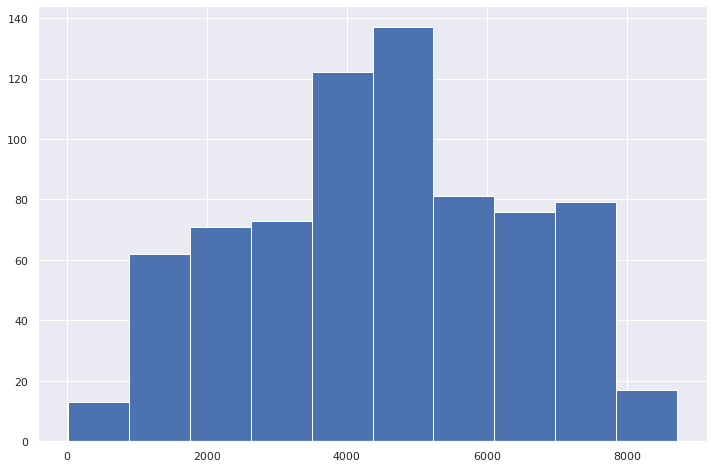

In [ ]:
data['cnt'].hist();

In [ ]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending = False)

,coef
windspeed(ms),3.051193e+12
yr,9.540706e+02
atemp,8.911709e+02
season,4.048576e+02
weekday,1.037114e+02
temp,6.248634e+01
mnth,3.081084e+01
workingday,1.470224e+01
holiday,-6.757366e+01
hum,-1.589777e+02


Видно, что чтобы компенсировать мультикол признаков, наша модель компенсировала windspeed(ms VS mph)

In [ ]:
def train_validate_report(model, X_train_scaled, y_train,
                          X_valid_scaled, y_valid, feature_names, forest = False):
  model.fit(X_train_scaled, y_train)
  print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))

  print("Model coef:")
  coef = model.feature_importances_ if forest else model.coef_
  coef_name = "Importance" if forest else 'Coef'

  print(pd.DataFrame(coef, feature_names, columns=[coef_name]).sort_values(by=coef_name, ascending = False))

In [ ]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid,
                      feature_names = data.columns[:-1])

MSE=1120.721409
Model coef:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


Lasso занулила windspeed(ms) удалила мультиколлинеарность!!!! (НО ОСТАВИЛА atemp и temp)

In [ ]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid,
                      feature_names = data.columns[:-1]);

MSE=1120.743661
Model coef:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [ ]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid,
                      feature_names = data.columns[:-1]);

MSE=1119.560520
Model coef:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [ ]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid,
                      feature_names = data.columns[:-1]);

MSE=1118.903543
Model coef:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [ ]:
forest = RandomForestRegressor(random_state = 17, n_estimators = 500)

In [ ]:
train_validate_report(forest, X_train, y_train, X_valid, y_valid,
                      feature_names = data.columns[:-1], forest = True);

MSE=1046.960772
Model coef:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
